In [ ]:
#| default_exp ripple_control

In [ ]:
#| export
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cylinder.utils import *
from scipy.stats import skew, skewnorm

# Ripple control statistices to modify the real operation

Ripple control is a technology that is used to manage the supply of electricity in residential hot water cylinders in New Zealand. This technology allows utility companies to remotely control the electricity supply to hot water cylinders, ensuring that electricity is used efficiently and cost-effectively.

One of the key benefits of ripple control is that it allows utility companies to manage the demand for electricity during peak periods. By limiting the amount of electricity that is supplied to hot water cylinders during these times, the utility company can help to prevent power outages and ensure that electricity is available to meet the needs of other customers.

Overall, ripple control is a useful technology that can help to manage the supply of electricity to residential hot water cylinders in New Zealand. By allowing utility companies to control the electricity supply, ripple control can help to prevent power outages, reduce electricity bills, and protect the environment.


A 2020 research paper by [EECA](https://www.eeca.govt.nz/assets/EECA-Resources/Research-papers-guides/Ripple-Control-of-Hot-Water-in-New-Zealand.pdf) reviews the current state and operation of the ripple control network.

Details of ripple control used for load management are detailled on the [Orion Network](https://online.oriongroup.co.nz/LoadManagement/Default.aspx?autorefresh=false){:target="_blank"}

In [ ]:
df = pd.read_excel('../data/orion_rc.xlsx', skiprows=11)
df = df.dropna(axis=1, how='all').iloc[:,:3]#.set_index('Date')
df.columns = ['Date', 'max_off', 'max_ave_off']
df = df.set_index('Date')
# convert h:m:s to seconds
df['max_off'] = pd.to_datetime(df['max_off'], format='%H:%M:%S')
df['max_ave_off'] = pd.to_datetime(df['max_ave_off'], format='%H:%M:%S')
df = df.assign(max_off = lambda x: x['max_off'].dt.hour*60 + x['max_off'].dt.minute + x['max_off'].dt.second/60,
          max_ave_off = lambda x: x['max_ave_off'].dt.hour*60 + x['max_ave_off'].dt.minute + x['max_ave_off'].dt.second/60,
          day = lambda x: x.index.dayofweek,
          month = lambda x: x.index.month,
          weekday = lambda x: x.index.weekday<5,
          season = lambda x: x.index.map(get_season))

In [ ]:
df

,max_off,max_ave_off,day,month,weekday,season
Date,,,,,,
2012-05-01,74.0,17.0,1,5,True,Autumn
2012-05-02,41.0,31.0,2,5,True,Autumn
2012-05-03,41.0,31.0,3,5,True,Autumn
2012-05-16,70.0,54.0,2,5,True,Autumn
2012-05-17,70.0,54.0,3,5,True,Autumn
...,...,...,...,...,...,...
2022-10-14,19.0,1.0,4,10,True,Spring
2022-10-18,30.0,16.0,1,10,True,Spring
2022-10-19,45.0,32.0,2,10,True,Spring


There is a large variation in frequency based on the season

Autumn 44.92028985507246 52.35728765624028 1.985906057501679
Winter 70.12273641851107 61.136638232997406 1.205216062727588
Spring 49.46829268292683 60.15001849552464 1.7514057414449147
Summer 51.98360655737705 79.70327031735863 1.7129228895001667


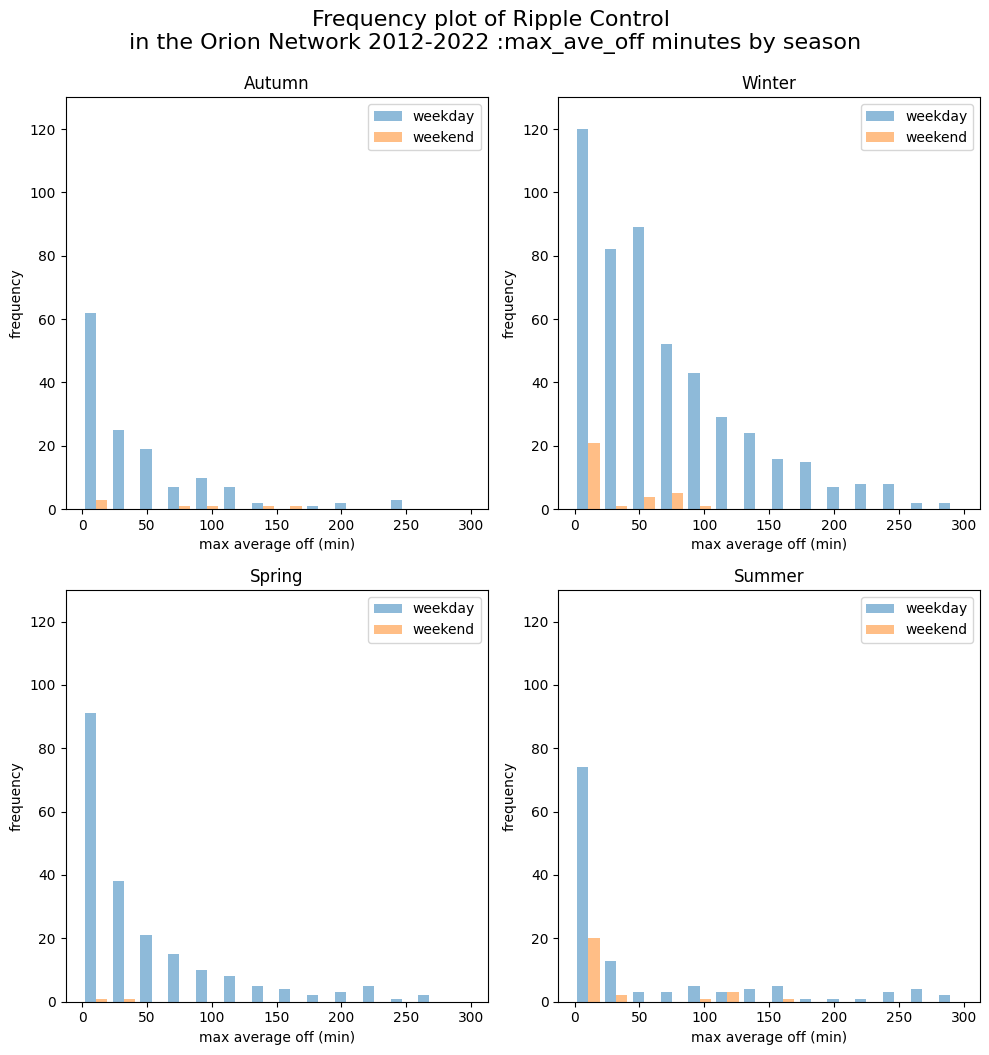

In [ ]:
# do a histogram plot of the max_average_off grouped by season and if the day was a week day or weekend as 4 separate subplots (one for each season)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
bins = np.linspace(0, 300, 15)

for i, season in enumerate(df['season'].unique()):
    ax = axes[i//2, i%2]
    t = np.linspace(0, 300, 100)
    # df[df['season'] == season].groupby('weekday')['max_ave_off'].plot(kind='hist', ax=ax, alpha=0.5, bins=bins, legend=True)
    print(season,
            df[(df.season == season)&(df['weekday']==True)].max_ave_off.mean(), 
            df[(df.season == season)&(df['weekday']==True)].max_ave_off.std(),skew(df[(df.season == season)&(df['weekday']==True)].max_ave_off))
    ax.hist([df[(df.season == season)&(df['weekday']==True)].max_ave_off,
             df[(df.season == season)&(df['weekday']==False)].max_ave_off],
             bins=bins, alpha=0.5, label=['weekday','weekend'])
    ax.set_title(season)
    ax.set_xlabel('max average off (min)')
    ax.set_ylabel('frequency')
    ax.set_ylim(0, 130)

    ax.legend()
plt.tight_layout()
fig.suptitle('Frequency plot of Ripple Control \nin the Orion Network 2012-2022 :max_ave_off minutes by season', fontsize=16, y=1.05)

plt.show()


